In [1]:
import numpy as np

In [2]:
import pandas as pd 

In [3]:
import matplotlib.pyplot as plt

In [4]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [5]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from nltk.stem.porter import PorterStemmer
import nltk
import re, string
from nltk.corpus import stopwords

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
#Import scikit-plot
import scikitplot as skplt
import matplotlib.pyplot as plt
#from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn import metrics

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:

data = pd.read_csv(r'C:/Users/ADMIN/Documents/DEARNN Full Code/M1/data/labeled_data.csv')

In [8]:

data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [9]:

data.shape

(24783, 7)

In [10]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [11]:

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,24783.0,12681.192027,7299.553863,0.0,6372.5,12703.0,18995.5,25296.0
count,24783.0,3.243473,0.883060,3.0,3.0,3.0,3.0,9.0
hate_speech,24783.0,0.280515,0.631851,0.0,0.0,0.0,0.0,7.0
offensive_language,24783.0,2.413711,1.399459,0.0,2.0,3.0,3.0,9.0
neither,24783.0,0.549247,1.113299,0.0,0.0,0.0,0.0,9.0
class,24783.0,1.110277,0.462089,0.0,1.0,1.0,1.0,2.0


In [12]:

data.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [13]:

data.filter(items=['class', 'tweet'])

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,2,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


<Axes: xlabel='class', ylabel='count'>

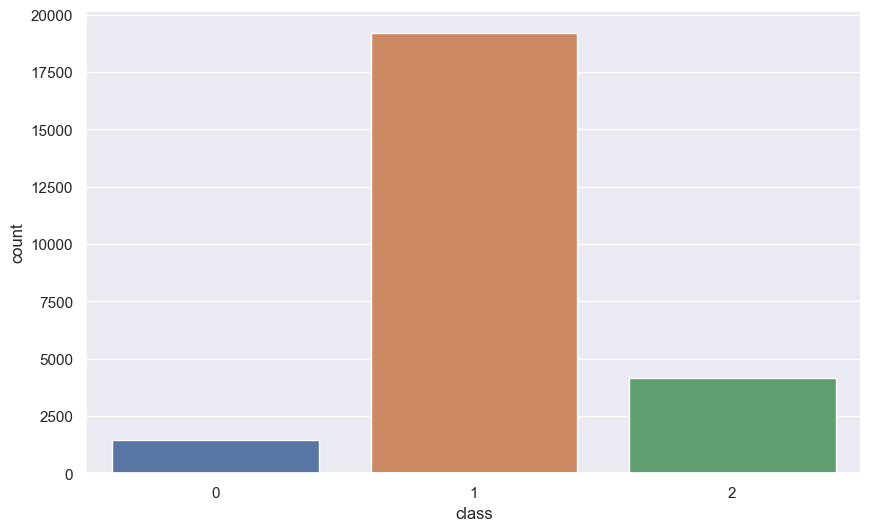

In [14]:

sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(x = 'class',data = data)

In [15]:
print(data)

       Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0               0      3            0                   0        3      2   
1               1      3            0                   3        0      1   
2               2      3            0                   3        0      1   
3               3      3            0                   2        1      1   
4               4      6            0                   6        0      1   
...           ...    ...          ...                 ...      ...    ...   
24778       25291      3            0                   2        1      1   
24779       25292      3            0                   1        2      2   
24780       25294      3            0                   3        0      1   
24781       25295      6            0                   6        0      1   
24782       25296      3            0                   0        3      2   

                                                   tweet  
0      !!! RT @m

# Data Engineering

1 ) Case conversion

2 ) Removing special characters

3 ) Removing shorthands

4 ) Removing stopwords

5 ) Removing links

6 ) Removing accents

7 ) Normalize spaces

In [16]:
import re
import unidecode
from autocorrect import Speller
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from nltk.corpus import stopwords

In [17]:


def case_convert():
    data.tweet = [i.lower() for i in data.tweet.values]

def remove_specials():
    data.tweet =  [re.sub(r"[^a-zA-Z]"," ",text) for text in data.tweet.values]

def remove_shorthands():
    CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }
    texts = []
    for text in data.tweet.values:
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word]
            else:
                string = string + " " + word
        texts.append(string.strip())
    data.tweet = texts

def remove_stopwords():
    texts = []
    stopwords_list = stopwords.words('english')
    for item in data.tweet.values:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        texts.append(string)
    data.tweet = texts
                
def remove_links():
    texts = []
    for text in data.tweet.values:
        remove_https = re.sub(r'http\S+', '', text)
        remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
        texts.append(remove_com)
    data.tweet = texts

def remove_accents():
    data.tweet = [unidecode.unidecode(text) for text in data.tweet.values]

def normalize_spaces():
    data.tweet = [re.sub(r"\s+"," ",text) for text in data.tweet.values]

case_convert()
remove_links()
# remove_shorthands()
remove_accents()
remove_specials()
remove_stopwords()
normalize_spaces()

print(data)

       Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0               0      3            0                   0        3      2   
1               1      3            0                   3        0      1   
2               2      3            0                   3        0      1   
3               3      3            0                   2        1      1   
4               4      6            0                   6        0      1   
...           ...    ...          ...                 ...      ...    ...   
24778       25291      3            0                   2        1      1   
24779       25292      3            0                   1        2      2   
24780       25294      3            0                   3        0      1   
24781       25295      6            0                   6        0      1   
24782       25296      3            0                   0        3      2   

                                                   tweet  
0       rt mayas

# Word Cloud Visualization

In [18]:
data_hate = data[data['class']==0]
data_offen = data[data['class']==1]
data_neither = data[data['class']==2]

# Abusive words

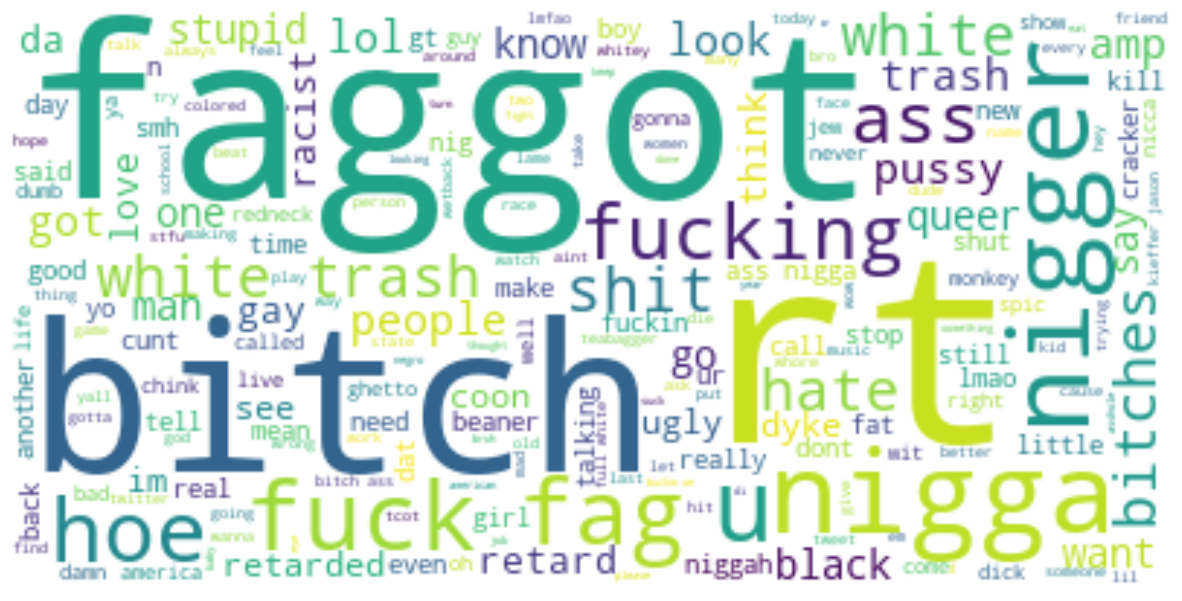

In [19]:
text = " ".join(i for i in data_hate.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#  offensive language

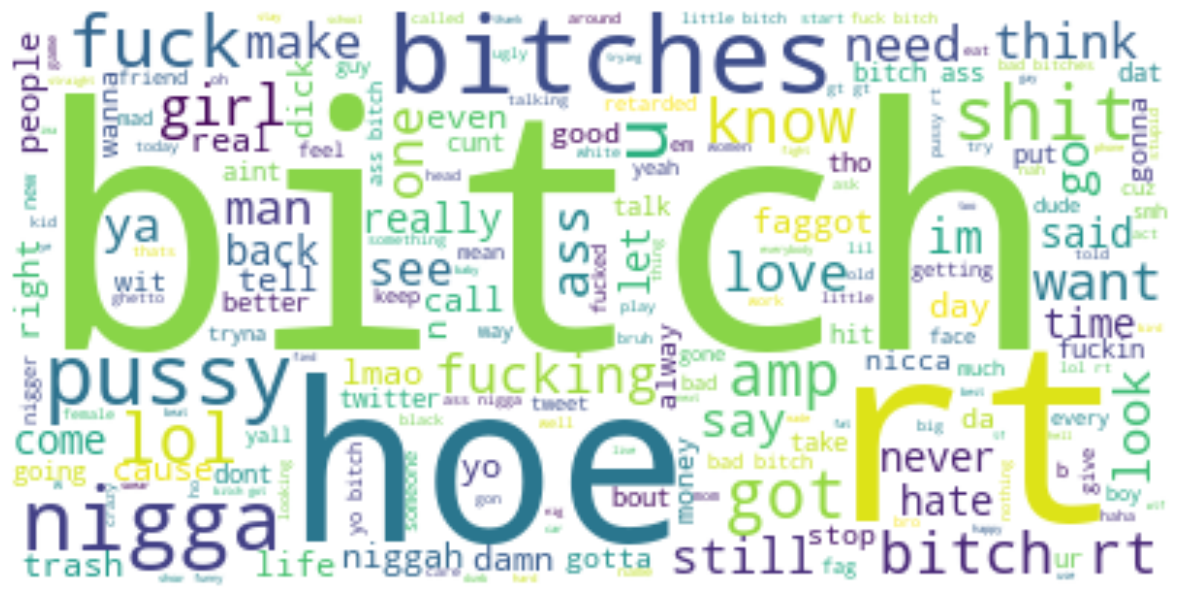

In [20]:
text = " ".join(i for i in data_offen.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# normal

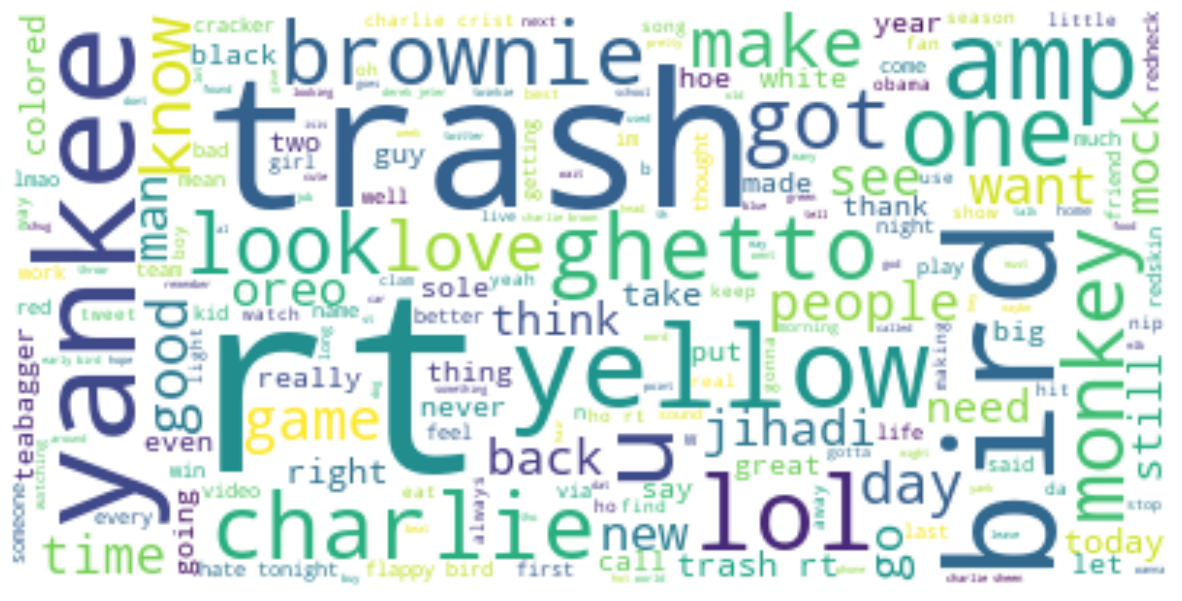

In [21]:
text = " ".join(i for i in data_neither.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
X=data["tweet"]
Y=data["class"]

In [23]:

import pickle

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(X) 

In [24]:
pickle.dump(cv, open("models/count_vectorizer.pickle", "wb"))

In [25]:

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = data['class'] )


In [26]:

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (19826, 31288)
X_test shape: (4957, 31288)
Y_train shape: (19826,)
Y_test shape: (4957,)


In [27]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [28]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [29]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier() 
abc.fit(X_train, Y_train)


AdaBoostClassifier()

In [30]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

In [31]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
X_train_dense = X_train.toarray()
gnbmodel = gnb.fit(X_train_dense, Y_train)
X_test_dense = X_test.toarray()

#Y_pred_gnb = gnb.predict(X_test)

In [32]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100,10), max_iter=100, verbose=True)
mlp.fit(X_train,Y_train)

Iteration 1, loss = 0.71694546
Iteration 2, loss = 0.27125084
Iteration 3, loss = 0.12656267
Iteration 4, loss = 0.05069083
Iteration 5, loss = 0.02524124
Iteration 6, loss = 0.01324618
Iteration 7, loss = 0.00902275
Iteration 8, loss = 0.00653030
Iteration 9, loss = 0.00493172
Iteration 10, loss = 0.00540048
Iteration 11, loss = 0.00418241
Iteration 12, loss = 0.00334702
Iteration 13, loss = 0.00363841
Iteration 14, loss = 0.00302665
Iteration 15, loss = 0.00356080
Iteration 16, loss = 0.00495518
Iteration 17, loss = 0.00410582
Iteration 18, loss = 0.00317577
Iteration 19, loss = 0.00424784
Iteration 20, loss = 0.00390781
Iteration 21, loss = 0.00535112
Iteration 22, loss = 0.00341678
Iteration 23, loss = 0.00328752
Iteration 24, loss = 0.00250600
Iteration 25, loss = 0.00346293
Iteration 26, loss = 0.00301684
Iteration 27, loss = 0.00244082
Iteration 28, loss = 0.00203302
Iteration 29, loss = 0.00173151
Iteration 30, loss = 0.00191715
Iteration 31, loss = 0.00190877
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(100, 100, 100, 10), max_iter=100,
              verbose=True)

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(verbose=True) #uses randomized decision trees
rfc.fit(X_train, Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.1min finished


RandomForestClassifier(verbose=True)

In [34]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="log", max_iter=100, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, Y_train)


SGDClassifier(loss='log', max_iter=100, random_state=42)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [36]:
from sklearn.naive_bayes import MultinomialNB
mnb_clf = MultinomialNB()
mnb_clf.fit(X_train, Y_train)

MultinomialNB()

In [37]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(
            base_estimator=DecisionTreeClassifier(),
            n_estimators=100,
            max_samples=0.5,
            max_features=0.5,
            random_state=42
            )
bag_clf.fit(X_train, Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=0.5,
                  max_samples=0.5, n_estimators=100, random_state=42)

In [38]:

Y_pred_logreg = logreg.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_dtc = dtc.predict(X_test)
Y_pred_abc = abc.predict(X_test)
Y_pred_gnb = gnb.predict(X_test_dense)
Y_pred_mlp = mlp.predict(X_test)
Y_pred_rfc = rfc.predict(X_test)
Y_pred_sgd = sgd_clf.predict(X_test)
Y_pred_knn = knn_clf.predict(X_test)
Y_pred_mnb = mnb_clf.predict(X_test)
Y_pred_bag = bag_clf.predict(X_test)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished


In [39]:

from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_dtc = accuracy_score(Y_test, Y_pred_dtc)
accuracy_abc = accuracy_score(Y_test, Y_pred_abc)
accuracy_gnb = accuracy_score(Y_test, Y_pred_gnb)
accuracy_mlp = accuracy_score(Y_test, Y_pred_mlp)
accuracy_rfc = accuracy_score(Y_test, Y_pred_rfc)
accuracy_sgd = accuracy_score(Y_test, Y_pred_sgd)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_mnb = accuracy_score(Y_test, Y_pred_mnb)
accuracy_bag=accuracy_score(Y_test, Y_pred_bag)


In [40]:

print("Logistic Regression      : " + str(accuracy_logreg * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Decision Tree Clasifier  : " + str(accuracy_dtc * 100))
print("Ada Boost Classifier     : " + str(accuracy_abc * 100))
print("naive_bayes              : " + str(accuracy_gnb * 100))
print("RandomForestClassifier   : " + str(accuracy_rfc * 100))
print("mlpClassifier            : " + str(accuracy_mlp * 100))
print("SGD Classifier           : " + str(accuracy_sgd * 100))
print("KNeighborsClassifier     : " + str(accuracy_knn * 100))
print("MultinomialNB            : " + str(accuracy_mnb * 100))
print("Bagging Classifier       : " + str(accuracy_bag * 100))

Logistic Regression      : 90.72019366552351
Support Vector Classifier: 89.77203954004437
Decision Tree Clasifier  : 89.52995763566673
Ada Boost Classifier     : 89.93342747629615
naive_bayes              : 56.6269921323381
RandomForestClassifier   : 89.8930804922332
mlpClassifier            : 87.04861811579583
SGD Classifier           : 90.65967318942909
KNeighborsClassifier     : 83.27617510591084
MultinomialNB            : 86.80653621141819
Bagging Classifier       : 87.61347589267702


In [41]:
a=accuracy_logreg * 100
c=accuracy_svc * 100



In [42]:
# Classification report
from sklearn.metrics import classification_report
print("Logistic Regression      :")
print(classification_report(Y_test, Y_pred_logreg))

Logistic Regression      :
              precision    recall  f1-score   support

           0       0.51      0.22      0.30       286
           1       0.93      0.96      0.95      3838
           2       0.86      0.89      0.88       833

    accuracy                           0.91      4957
   macro avg       0.77      0.69      0.71      4957
weighted avg       0.89      0.91      0.90      4957



In [43]:
print("Support Vector Classifier:")
print(classification_report(Y_test, Y_pred_svc))

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.39      0.26      0.31       286
           1       0.93      0.95      0.94      3838
           2       0.86      0.87      0.87       833

    accuracy                           0.90      4957
   macro avg       0.73      0.69      0.71      4957
weighted avg       0.89      0.90      0.89      4957



In [44]:
print("Decision Tree Clasifier  :")
print(classification_report(Y_test, Y_pred_dtc))


Decision Tree Clasifier  :
              precision    recall  f1-score   support

           0       0.37      0.30      0.33       286
           1       0.94      0.94      0.94      3838
           2       0.86      0.88      0.87       833

    accuracy                           0.90      4957
   macro avg       0.72      0.71      0.71      4957
weighted avg       0.89      0.90      0.89      4957



In [45]:
print("Ada Boost Classifier     :")
print(classification_report(Y_test, Y_pred_abc))


Ada Boost Classifier     :
              precision    recall  f1-score   support

           0       0.55      0.16      0.25       286
           1       0.94      0.95      0.94      3838
           2       0.78      0.93      0.85       833

    accuracy                           0.90      4957
   macro avg       0.76      0.68      0.68      4957
weighted avg       0.89      0.90      0.89      4957



In [46]:
print("naive_bayes              : ")
print(classification_report(Y_test, Y_pred_gnb))


naive_bayes              : 
              precision    recall  f1-score   support

           0       0.08      0.30      0.12       286
           1       0.83      0.59      0.69      3838
           2       0.41      0.53      0.46       833

    accuracy                           0.57      4957
   macro avg       0.44      0.48      0.42      4957
weighted avg       0.71      0.57      0.62      4957



In [47]:
print("RandomForestClassifier   : ")
print(classification_report(Y_test, Y_pred_rfc))


RandomForestClassifier   : 
              precision    recall  f1-score   support

           0       0.48      0.24      0.32       286
           1       0.92      0.96      0.94      3838
           2       0.87      0.84      0.85       833

    accuracy                           0.90      4957
   macro avg       0.76      0.68      0.71      4957
weighted avg       0.89      0.90      0.89      4957



In [48]:
print("mlpClassifier            : ")
print(classification_report(Y_test, Y_pred_mlp))


mlpClassifier            : 
              precision    recall  f1-score   support

           0       0.35      0.30      0.32       286
           1       0.91      0.93      0.92      3838
           2       0.82      0.79      0.81       833

    accuracy                           0.87      4957
   macro avg       0.69      0.67      0.68      4957
weighted avg       0.87      0.87      0.87      4957



In [49]:
print("SGD Classifier           : ")
print(classification_report(Y_test, Y_pred_sgd))


SGD Classifier           : 
              precision    recall  f1-score   support

           0       0.57      0.20      0.30       286
           1       0.93      0.96      0.95      3838
           2       0.84      0.90      0.87       833

    accuracy                           0.91      4957
   macro avg       0.78      0.69      0.70      4957
weighted avg       0.89      0.91      0.90      4957



In [50]:
print("KNeighborsClassifier     : ")
print(classification_report(Y_test, Y_pred_knn))


KNeighborsClassifier     : 
              precision    recall  f1-score   support

           0       0.22      0.35      0.27       286
           1       0.91      0.93      0.92      3838
           2       0.80      0.56      0.66       833

    accuracy                           0.83      4957
   macro avg       0.64      0.61      0.61      4957
weighted avg       0.85      0.83      0.84      4957



In [51]:
print("MultinomialNB            : ")
print(classification_report(Y_test, Y_pred_mnb))


MultinomialNB            : 
              precision    recall  f1-score   support

           0       0.34      0.07      0.12       286
           1       0.88      0.97      0.92      3838
           2       0.84      0.66      0.74       833

    accuracy                           0.87      4957
   macro avg       0.69      0.57      0.59      4957
weighted avg       0.84      0.87      0.85      4957



In [52]:
print("Bagging Classifier       : ")
print(classification_report(Y_test, Y_pred_bag))


Bagging Classifier       : 
              precision    recall  f1-score   support

           0       0.73      0.06      0.10       286
           1       0.87      0.99      0.93      3838
           2       0.89      0.65      0.75       833

    accuracy                           0.88      4957
   macro avg       0.83      0.56      0.59      4957
weighted avg       0.87      0.88      0.85      4957



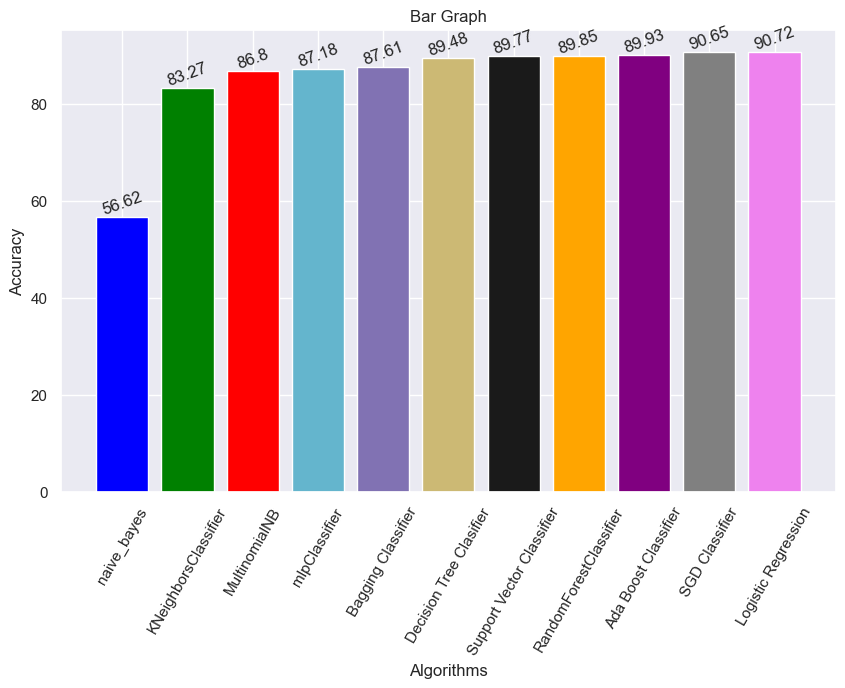

In [53]:
import matplotlib.pyplot as plt

# Example data
labels = ['Logistic Regression','Support Vector Classifier','Decision Tree Clasifier','Ada Boost Classifier',
'naive_bayes','RandomForestClassifier','mlpClassifier','SGD Classifier','KNeighborsClassifier','MultinomialNB','Bagging Classifier']
accuracy_scores = [90.72,89.77,89.48,89.93,56.62,89.85
,87.18,90.65,83.27,86.80,87.61]
colors = ['blue', 'green', 'red', 'c', 'm', 'y', 'k', 'orange', 'purple','gray','violet']
sorted_data = sorted(zip(accuracy_scores, labels))
accuracy_scores, labels = zip(*sorted_data)# Create a new plot
fig, ax = plt.subplots()

# Plot the data
ax.bar(labels, accuracy_scores,color=colors)
plt.xticks(rotation=60)
for i, v in enumerate(accuracy_scores):
    ax.text(i, v, str(v), ha='center', va='bottom',rotation=20)
# Add labels and title
ax.set_xlabel('Algorithms')
ax.set_ylabel('Accuracy')
ax.set_title('Bar Graph')

# Show the plot
plt.show()

# Save the model as a pickle

In [54]:
import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(svc, 'models/svm_model.pkl') 

# Load the model from the file 
svm_from_joblib = joblib.load('models/svm_model.pkl')  
  
# Use the loaded model to make predictions 
svm_from_joblib.predict(X_test) 

array([1, 2, 1, ..., 1, 1, 1], dtype=int64)

# Abusive contents

In [55]:
message=["Jackies a retard #blondeproblems At least I can make a grilled cheese!"]

vect = cv.transform(message).toarray()
my_prediction = logreg.predict(vect)
print(my_prediction)


[1]


In [56]:
message=["cant you see these hoes wont change"]

vect = cv.transform(message).toarray()
my_prediction = logreg.predict(vect)
#if(my_prediction==1)
print(my_prediction)

[1]


# Normal

In [57]:
message=["Peel up peel up bring it back up rewind back where I'm from they move Shaq from the line"]

vect = cv.transform(message).toarray()
my_prediction = logreg.predict(vect)
print(my_prediction)

[2]


# 